In [1]:
# Connect to Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import matplotlib as mpl
import missingno as msno
from scipy import stats

# DATAFRAME ANALYSIS

In [3]:
# Load the dataset from Drive folder

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/INNOMATICS RESEARCH LAB INTERNSHIP/DATA ANALYSIS/P7_SCORES_DATA_ANALYSIS/scores_data.csv')

In [4]:
# View first 5 rows of the DataFrame

df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [5]:
# View last 5 rows of the DataFrame

df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [6]:
# View information about a DataFrame including the index dtype and columns, non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [7]:
# View descriptive statistics of the DataFrame

df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [8]:
# View shape of the DataFrame

df.shape

(149, 3)

In [9]:
# Number of elements in each column

df.count()

Batch          149
User_ID        149
   Score       149
dtype: int64

In [10]:
# Counting number of duplicate rows

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 3)


In [11]:
# View columns of DataFrame

df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [12]:
# Renaming columns to remove any spaces in name

df.columns = df.columns.str.replace(' ', '')

In [13]:
# View columns of DataFrame

df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [14]:
# Print unique entries in Batch column

df['Batch'].unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [15]:
# Print unique entries in Score column

df['Score'].unique()

array(['6 / 7', '7 / 7', '4 / 7', '5 / 7', '3 / 7', '2 / 7', '0 / 7',
       '1 / 7'], dtype=object)

In [16]:
# Print numerical columns of DataFrame

numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index([], dtype='object')

In [17]:
# Print categorical columns of DataFrame

categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

<ipython-input-17-886643fe52e6>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object])


Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [18]:
# Total number of null entries in each column

df.isnull().sum()

Batch      0
User_ID    0
Score      0
dtype: int64

In [19]:
# Extracted scores obtained out of 7 in a new column Obtained

Obtained = df.Score.str.extract('(\d)')
print(Obtained)

     0
0    6
1    6
2    7
3    7
4    4
..  ..
144  4
145  4
146  4
147  3
148  2

[149 rows x 1 columns]


In [20]:
# View information about a DataFrame including the index dtype and columns, non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [21]:
# Convert Obtained column from categorical to numeric

df['Obtained'] = Obtained.apply(pd.to_numeric)

In [22]:
# View information about a DataFrame including the index dtype and columns, non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Batch     149 non-null    object
 1   User_ID   149 non-null    object
 2   Score     149 non-null    object
 3   Obtained  149 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 4.8+ KB


In [23]:
# Drop User_ID column from DataFrame as it is redundant

df = df.drop('User_ID',axis=1)

In [24]:
print(df)

          Batch  Score  Obtained
0    AI_ELITE_7  6 / 7         6
1    AI_ELITE_7  6 / 7         6
2    AI_ELITE_7  7 / 7         7
3    AI_ELITE_7  7 / 7         7
4    AI_ELITE_7  4 / 7         4
..          ...    ...       ...
144  AI_ELITE_4  4 / 7         4
145  AI_ELITE_4  4 / 7         4
146  AI_ELITE_4  4 / 7         4
147  AI_ELITE_4  3 / 7         3
148  AI_ELITE_4  2 / 7         2

[149 rows x 3 columns]


In [25]:
# Print count of unique rows in DataFrame

df.value_counts()

Batch       Score  Obtained
AI_ELITE_4  4 / 7  4           19
AI_ELITE_7  6 / 7  6           13
AI_ELITE_6  5 / 7  5           13
            4 / 7  4           11
AI_ELITE_7  5 / 7  5           11
            7 / 7  7           10
            4 / 7  4           10
AI_ELITE_6  3 / 7  3            9
AI_ELITE_4  5 / 7  5            8
            3 / 7  3            8
AI_ELITE_7  3 / 7  3            7
AI_ELITE_4  2 / 7  2            7
AI_ELITE_6  7 / 7  7            5
            6 / 7  6            4
            2 / 7  2            3
AI_ELITE_4  7 / 7  7            3
AI_ELITE_6  1 / 7  1            2
AI_ELITE_7  2 / 7  2            2
AI_ELITE_6  0 / 7  0            1
AI_ELITE_4  1 / 7  1            1
            6 / 7  6            1
            0 / 7  0            1
dtype: int64

In [26]:
# # Print count of unique batches in DataFrame

df['Batch'].value_counts()

AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: Batch, dtype: int64

<Axes: ylabel='Batches'>

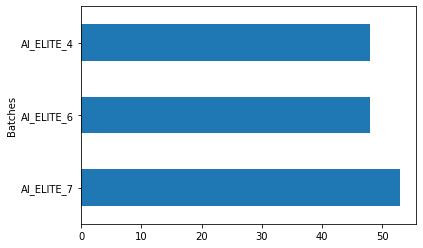

In [27]:
# Plot horizontal bar graph for number of rows in unique batches

df['Batch'].value_counts().plot(kind='barh',xlabel='Batches',ylabel='Frequency')

Interpretation : Each batch has 40 - 50 entries in them with heighest being in AI_ELITE_7.

In [28]:
# # Print count of unique obtained scores in DataFrame

df['Obtained'].value_counts()

4    40
5    32
3    24
6    18
7    18
2    12
1     3
0     2
Name: Obtained, dtype: int64

Interpretation : 64% of the students obtained average scores of 3,4,5 ; 24% students obtained high scores of 6,7 and only 3.33% students obtained low scores of 0,1.

The horizontal bar graph plots this.

<Axes: ylabel='Frequency'>

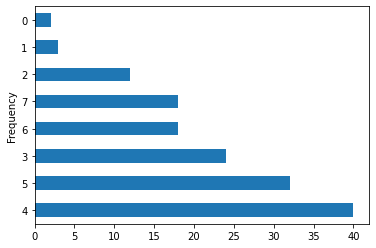

In [29]:
# Plot horizontal bar graph for number of rows in unique obtained scores

df['Obtained'].value_counts().plot(kind='barh',ylabel='Scores obtained',xlabel='Frequency')

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'Scatterplot for scores obtained by batch'}, xlabel='Obtained', ylabel='Batch'>

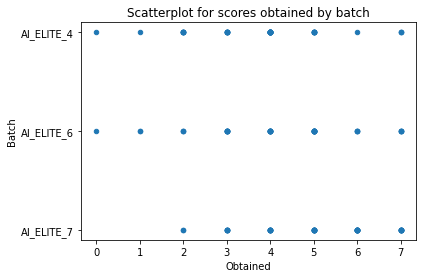

In [30]:
# Scatter plot for scores obtained by each batch

df.plot(kind='scatter', x='Obtained', y='Batch',title='Scatterplot for scores obtained by batch')

Interpretation : Scatterplot shows that no one obtained 0,1 in AI_ELITE_7 while in AI_ELITE_6 and AI_ELITE_4 all scores were obtained.

<Axes: title={'center': 'Obtained'}, xlabel='Batch'>

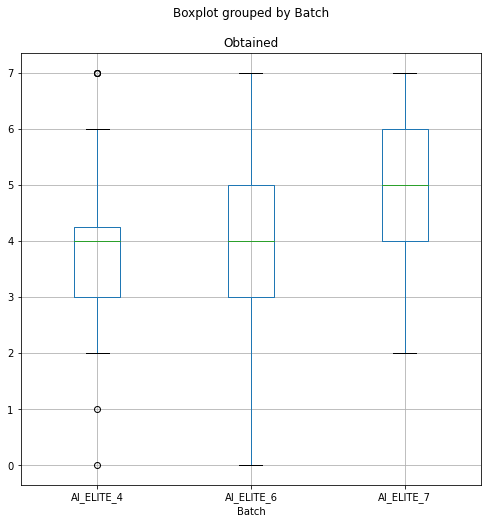

In [31]:
# Boxplot for each batch of the DataFrame
# Boxplot is used to give info about data's symmetry, skew, variance, and outliers

df.boxplot(by='Batch', column='Obtained', figsize=(8, 8))

Interpretation : Boxplot displays that the best performing students are in AI_ELITE_7 with highest average score of 5. Next comes AI_ELITE_6 with average score of 4. AI_ELITE_4 also scores the average of 4 but contains some outliers with scores 0,1,7.

<Axes: title={'center': 'Normal'}, xlabel='Obtained', ylabel='Density'>

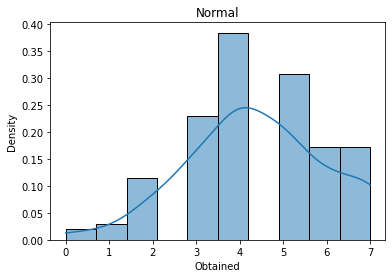

In [32]:
# Histogram of scores obtained along with KDE line

y = df['Obtained']
plt.figure(1); plt.title('Normal')
sns.histplot(y, kde=True, stat='density')

Interpretation : Highest kernel density exists in right half of the histogram i.e scores ranging from 4 to 7

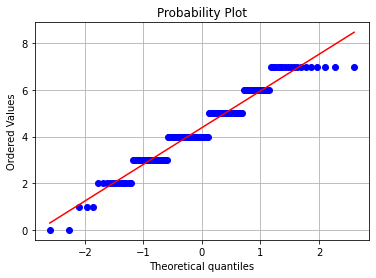

In [33]:
# Normal distribution graph for scores obtained of the DataFrame

stats.probplot(df['Obtained'], dist="norm", plot=plt)
plt.grid()

Interpretation : As the blue dots do not follow the red diagonal line the data is not normal

In [34]:
# Print skewness of DataFrame

print(df.skew())

Obtained   -0.179743
dtype: float64


<ipython-input-34-f787b1af9b5c>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())


Interpretation : Negative skewness indicates long left tail i.e majority of the data is located towards right of the mean value

In [35]:
# Print kurtosis of DataFrame

print(df.kurt())

Obtained   -0.238746
dtype: float64


<ipython-input-35-ce5205a0fde2>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.kurt())


Interpretation : Negative kurtosis indicates data is less outlier prone than normal distribution.

In [36]:
# Print quartiles of DataFrame and inter quartile range for the same

q1 = df['Obtained'].quantile(0.25)
q2 = df['Obtained'].quantile(0.5)
q3 = df['Obtained'].quantile(0.75)

print('Quartile 1:',q1)
print('Quartile 2:',q2)
print('Quartile 3:',q3)

IQR = q3 - q1
print('Inter Quartile Range',IQR)

Quartile 1: 3.0
Quartile 2: 4.0
Quartile 3: 5.0
Inter Quartile Range 2.0


# BATCH A7 ANALYSIS

In [37]:
# Data of Batch AI_ELITE_7

A7 = df.loc[df['Batch'] == 'AI_ELITE_7']
print(A7)

         Batch  Score  Obtained
0   AI_ELITE_7  6 / 7         6
1   AI_ELITE_7  6 / 7         6
2   AI_ELITE_7  7 / 7         7
3   AI_ELITE_7  7 / 7         7
4   AI_ELITE_7  4 / 7         4
5   AI_ELITE_7  7 / 7         7
6   AI_ELITE_7  5 / 7         5
7   AI_ELITE_7  7 / 7         7
8   AI_ELITE_7  3 / 7         3
9   AI_ELITE_7  6 / 7         6
10  AI_ELITE_7  6 / 7         6
11  AI_ELITE_7  3 / 7         3
12  AI_ELITE_7  6 / 7         6
13  AI_ELITE_7  5 / 7         5
14  AI_ELITE_7  6 / 7         6
15  AI_ELITE_7  7 / 7         7
16  AI_ELITE_7  7 / 7         7
17  AI_ELITE_7  7 / 7         7
18  AI_ELITE_7  5 / 7         5
19  AI_ELITE_7  7 / 7         7
20  AI_ELITE_7  4 / 7         4
21  AI_ELITE_7  5 / 7         5
22  AI_ELITE_7  6 / 7         6
23  AI_ELITE_7  5 / 7         5
24  AI_ELITE_7  7 / 7         7
25  AI_ELITE_7  3 / 7         3
26  AI_ELITE_7  4 / 7         4
27  AI_ELITE_7  6 / 7         6
28  AI_ELITE_7  4 / 7         4
29  AI_ELITE_7  5 / 7         5
30  AI_E

In [38]:
# View descriptive statistics of the A7 DataFrame

A7['Obtained'].describe()

count    53.000000
mean      5.056604
std       1.446682
min       2.000000
25%       4.000000
50%       5.000000
75%       6.000000
max       7.000000
Name: Obtained, dtype: float64

In [39]:
# Print quartiles of A7 DataFrame and inter quartile range for the same

q1 = A7['Obtained'].quantile(0.25)
q2 = A7['Obtained'].quantile(0.5)
q3 = A7['Obtained'].quantile(0.75)

print('Quartile 1',q1)
print('Quartile 2',q2)
print('Quartile 3',q3)

IQR = q3 - q1
print('Inter Quartile Range',IQR)

Quartile 1 4.0
Quartile 2 5.0
Quartile 3 6.0
Inter Quartile Range 2.0


In [40]:
# Print skewness of A7 DataFrame

A7['Obtained'].skew()

-0.3002625954072522

Interpretation : Negative skewness indicates long left tail i.e majority of the data is located towards right of the mean value

In [41]:
# Print kurtosis of A7 DataFrame

A7['Obtained'].kurt()

-0.888830026873602

Interpretation : Negative kurtosis indicates data is less outlier prone than normal distribution.

<Axes: title={'center': 'Box plot for scores obtained'}, ylabel='Scores Obtained'>

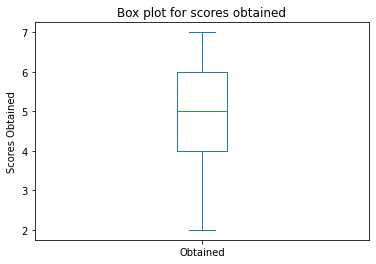

In [42]:
# Boxplot for scores obtained of A7 batch 

A7['Obtained'].plot(title='Box plot for scores obtained',ylabel='Scores Obtained',kind='box')

Interpretation : Boxplot displays that average of AI_ELITE_7 is 5 with interquartile range of 4 to 6 and lowest and highest obtained scores as 2 and 7

<Axes: title={'center': 'KDE Graph for scores obtained'}, ylabel='Density'>

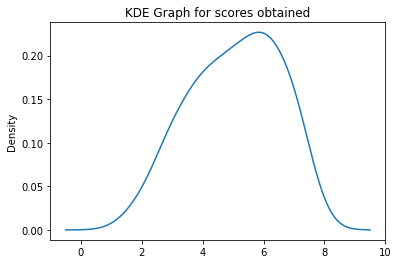

In [43]:
# KDE graph for scores obtained of A7 batch

A7['Obtained'].plot(title='KDE Graph for scores obtained',kind='kde')

Interpretation : Highest kernel density in AI_ELITE_7 exists in right half of the histogram i.e scores ranging from 4 to 7 which starts increasing from 2 and decreasing at 6.

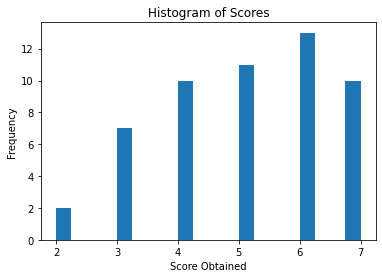

In [44]:
# Histogram for scores obtained of A7 batch 

plt.hist(A7['Obtained'], bins=20)
plt.title("Histogram of Scores")
plt.xlabel("Score Obtained")
plt.ylabel("Frequency")
plt.show()

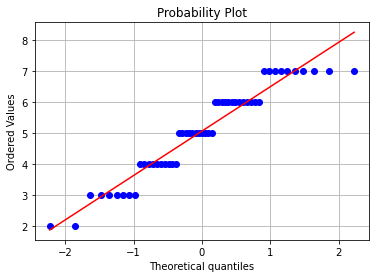

In [45]:
# Normal distribution graph for scores obtained of A7 batch 

stats.probplot(A7['Obtained'],dist='norm',plot=plt)
plt.grid()

Interpretation : As the blue dots do not follow the red diagonal line the data is not normal

# BATCH A6 ANALYSIS

In [46]:
# Data of Batch AI_ELITE_6

A6 = df.loc[df['Batch'] == 'AI_ELITE_6']
print(A6)

          Batch  Score  Obtained
53   AI_ELITE_6  3 / 7         3
54   AI_ELITE_6  4 / 7         4
55   AI_ELITE_6  6 / 7         6
56   AI_ELITE_6  6 / 7         6
57   AI_ELITE_6  4 / 7         4
58   AI_ELITE_6  3 / 7         3
59   AI_ELITE_6  4 / 7         4
60   AI_ELITE_6  3 / 7         3
61   AI_ELITE_6  5 / 7         5
62   AI_ELITE_6  3 / 7         3
63   AI_ELITE_6  7 / 7         7
64   AI_ELITE_6  5 / 7         5
65   AI_ELITE_6  5 / 7         5
66   AI_ELITE_6  5 / 7         5
67   AI_ELITE_6  7 / 7         7
68   AI_ELITE_6  0 / 7         0
69   AI_ELITE_6  5 / 7         5
70   AI_ELITE_6  4 / 7         4
71   AI_ELITE_6  1 / 7         1
72   AI_ELITE_6  4 / 7         4
73   AI_ELITE_6  5 / 7         5
74   AI_ELITE_6  7 / 7         7
75   AI_ELITE_6  4 / 7         4
76   AI_ELITE_6  3 / 7         3
77   AI_ELITE_6  3 / 7         3
78   AI_ELITE_6  7 / 7         7
79   AI_ELITE_6  6 / 7         6
80   AI_ELITE_6  3 / 7         3
81   AI_ELITE_6  6 / 7         6
82   AI_EL

In [47]:
# View descriptive statistics of the A6 DataFrame

A6['Obtained'].describe()

count    48.000000
mean      4.229167
std       1.640441
min       0.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       7.000000
Name: Obtained, dtype: float64

In [48]:
# Print quartiles of A6 DataFrame and inter quartile range for the same

q1 = A6['Obtained'].quantile(0.25)
q2 = A6['Obtained'].quantile(0.5)
q3 = A6['Obtained'].quantile(0.75)

print('Quartile 1',q1)
print('Quartile 2',q2)
print('Quartile 3',q3)

IQR = q3 - q1
print('Inter Quartile Range',IQR)

Quartile 1 3.0
Quartile 2 4.0
Quartile 3 5.0
Inter Quartile Range 2.0


In [49]:
# Print skewness of A6 DataFrame

A6['Obtained'].skew()

-0.2943730728273874

Interpretation : Negative skewness indicates long left tail i.e majority of the data is located towards right of the mean value

In [50]:
# Print kurtosis of A6 DataFrame

A6['Obtained'].kurt()

0.03894253026938932

Interpretation : Positive kurtosis indicates data is slighlty outlier prone than normal distribution.

<Axes: title={'center': 'Box plot for scores obtained'}, ylabel='Scores Obtained'>

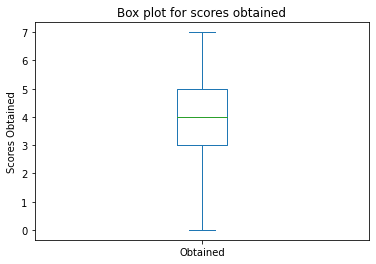

In [51]:
# Boxplot for scores obtained of A6 batch

A6['Obtained'].plot(title='Box plot for scores obtained',ylabel='Scores Obtained',kind='box')

Interpretation : Boxplot displays that average of AI_ELITE_6 is 4 with interquartile range of 3 to 5 and lowest and highest obtained scores as 0 and 7

<Axes: title={'center': 'KDE Graph for scores obtained'}, ylabel='Density'>

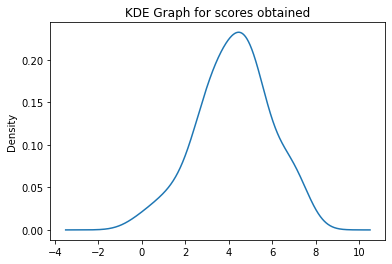

In [52]:
# KDE graph for scores obtained of A6 batch

A6['Obtained'].plot(title='KDE Graph for scores obtained',kind='kde')

Interpretation : Highest kernel density in AI_ELITE_6 exists in right half of the histogram i.e scores ranging from 4 to 7 which starts increasing from 2 and decreasing at 6.

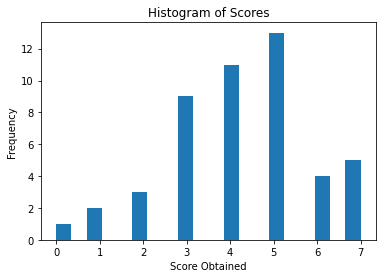

In [53]:
# Histogram for scores obtained of A6 batch 

plt.hist(A6['Obtained'], bins=20)
plt.title("Histogram of Scores")
plt.xlabel("Score Obtained")
plt.ylabel("Frequency")
plt.show()

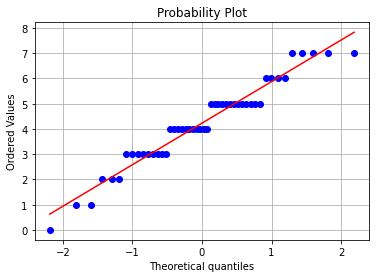

In [54]:
# Normal distribution graph for scores obtained of A6 batch 
# As the blue dots do not follow the red diagonal line the data is not normal

stats.probplot(A6['Obtained'],dist='norm',plot=plt)
plt.grid()

Interpretation : As the blue dots do not follow the red diagonal line the data is not normal

# BATCH A4 ANALYSIS

In [55]:
# Data of Batch AI_ELITE_4

A4 = df.loc[df['Batch'] == 'AI_ELITE_4']
print(A4)

          Batch  Score  Obtained
101  AI_ELITE_4  7 / 7         7
102  AI_ELITE_4  5 / 7         5
103  AI_ELITE_4  4 / 7         4
104  AI_ELITE_4  4 / 7         4
105  AI_ELITE_4  7 / 7         7
106  AI_ELITE_4  5 / 7         5
107  AI_ELITE_4  6 / 7         6
108  AI_ELITE_4  2 / 7         2
109  AI_ELITE_4  2 / 7         2
110  AI_ELITE_4  4 / 7         4
111  AI_ELITE_4  2 / 7         2
112  AI_ELITE_4  5 / 7         5
113  AI_ELITE_4  2 / 7         2
114  AI_ELITE_4  2 / 7         2
115  AI_ELITE_4  4 / 7         4
116  AI_ELITE_4  2 / 7         2
117  AI_ELITE_4  4 / 7         4
118  AI_ELITE_4  5 / 7         5
119  AI_ELITE_4  4 / 7         4
120  AI_ELITE_4  3 / 7         3
121  AI_ELITE_4  3 / 7         3
122  AI_ELITE_4  5 / 7         5
123  AI_ELITE_4  4 / 7         4
124  AI_ELITE_4  5 / 7         5
125  AI_ELITE_4  3 / 7         3
126  AI_ELITE_4  3 / 7         3
127  AI_ELITE_4  3 / 7         3
128  AI_ELITE_4  4 / 7         4
129  AI_ELITE_4  1 / 7         1
130  AI_EL

In [56]:
# View descriptive statistics of the A4 DataFrame

A4['Obtained'].describe()

count    48.000000
mean      3.791667
std       1.443376
min       0.000000
25%       3.000000
50%       4.000000
75%       4.250000
max       7.000000
Name: Obtained, dtype: float64

In [57]:
# View descriptive statistics of the A4 DataFrame

q1 = A4['Obtained'].quantile(0.25)
q2 = A4['Obtained'].quantile(0.5)
q3 = A4['Obtained'].quantile(0.75)

print('Quartile 1',q1)
print('Quartile 2',q2)
print('Quartile 3',q3)

IQR = q3 - q1
print('Inter Quartile Range',IQR)

Quartile 1 3.0
Quartile 2 4.0
Quartile 3 4.25
Inter Quartile Range 1.25


In [58]:
# Print skewness of A4 DataFrame

A4['Obtained'].skew()

0.026815543307560592

Interpretation : Positive skewness indicates long right tail i.e majority of the data is located towards left of the mean value

In [59]:
# Print kurtosis of A4 DataFrame

A4['Obtained'].kurt()

0.7055227382053659

Interpretation : Positive kurtosis indicates data is more outlier prone than normal distribution.

<Axes: title={'center': 'Box plot for scores obtained'}, ylabel='Scores Obtained'>

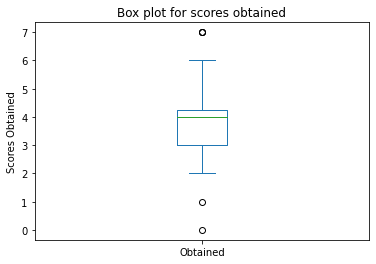

In [60]:
# Boxplot for scores obtained of A4 batch

A4['Obtained'].plot(title='Box plot for scores obtained',ylabel='Scores Obtained',kind='box')

Interpretation : Boxplot displays that average of AI_ELITE_4 is 4 with interquartile range of 3 to 5 and lowest and highest obtained scores as 2 and 6 but has outliers at 0,1 and 7.

<Axes: title={'center': 'KDE Graph for scores obtained'}, ylabel='Density'>

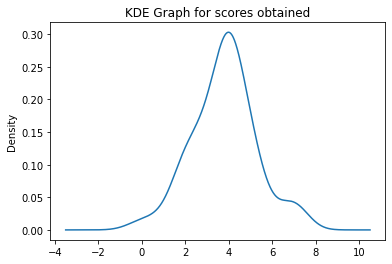

In [61]:
# KDE graph for scores obtained of A4 batch

A4['Obtained'].plot(title='KDE Graph for scores obtained',kind='kde')

Interpretation : Highest kernel density in AI_ELITE_4 exists in right half of the histogram i.e scores ranging from 4 to 7 which starts increasing from 2 and decreasing at 5.

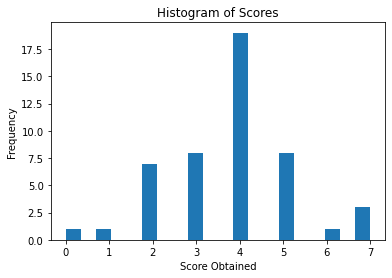

In [62]:
# Histogram for scores obtained of A4 batch 

plt.hist(A4['Obtained'], bins=20)
plt.title("Histogram of Scores")
plt.xlabel("Score Obtained")
plt.ylabel("Frequency")
plt.show()

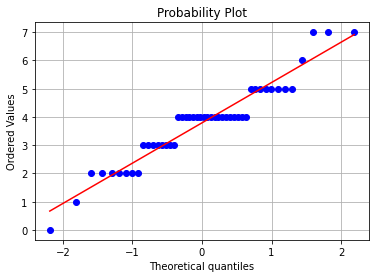

In [63]:
# Normal distribution graph for scores obtained of A4 batch 
# As the blue dots do not follow the red diagonal line the data is not normal

stats.probplot(A4['Obtained'],dist='norm',plot=plt)
plt.grid()

Interpretation : As the blue dots do not follow the red diagonal line the data is not normal

# INTER BATCH ANALYSIS

T-test used to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

In [64]:
# T-test between scores obtained of batches AI_ELITE_7 and AI_ELITE_6

batch1 = A7['Obtained']
batch2 = A6['Obtained']
stats.ttest_ind(batch1, batch2)

Ttest_indResult(statistic=2.6935860864710466, pvalue=0.00830361827784165)

In [65]:
# T-test between scores obtained of batches AI_ELITE_4 and AI_ELITE_6

batch1 = A4['Obtained']
batch2 = A6['Obtained']
stats.ttest_ind(batch1, batch2)

Ttest_indResult(statistic=-1.3872036113842057, pvalue=0.16866003403905933)

In [66]:
# T-test between scores obtained of batches AI_ELITE_7 and AI_ELITE_4

batch1 = A7['Obtained']
batch2 = A4['Obtained']
stats.ttest_ind(batch1, batch2)

Ttest_indResult(statistic=4.3930378021422225, pvalue=2.807694478724992e-05)